<a href="https://colab.research.google.com/github/CoderChroidheain/An-Introduction-To-Applied-Bioinformatics/blob/master/SampleCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of training feature data is  (60000, 784)
Shape of testing feature data is  (10000, 784)


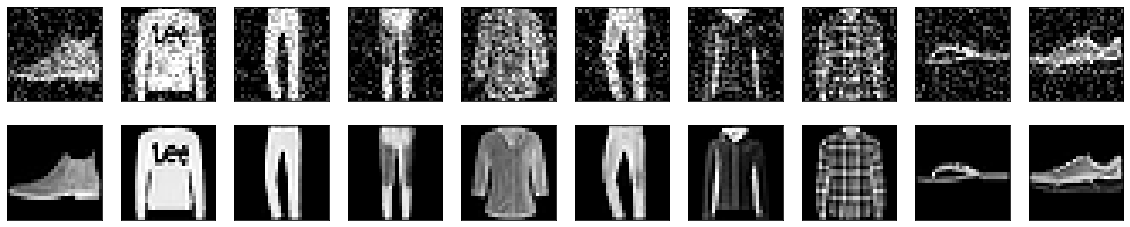

(60000, 784) (10000, 784)
(60000, 784) (10000, 784)


In [ ]:

import tensorflow as tf
import matplotlib.pyplot as plt

def main():

  (x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

  # Normalize train and test data
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0

  # Reshape so that each instance is a linear array of 784 normalized pixel values
  x_train = x_train.reshape((len(x_train), 784))
  x_test = x_test.reshape((len(x_test), 784))

  print ("Shape of training feature data is ", x_train.shape)
  print ("Shape of testing feature data is ", x_test.shape)

  # Add random noise to the image
  noise_factor = 0.2
  x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
  x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

  # Clip the resulting values so that they don't fall outside the upper and lower normalized value of 0 and 1
  x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
  x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


  n = 10  # Number of images to display

  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test_noisy[i].numpy().reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

  print (x_train.shape, x_test.shape)
  print (x_train_noisy.shape, x_test_noisy.shape)

main()